### <p style="text-align: right;"> &#9989; Benjamin Sinko</p>

---
# 0. Setting up your Python modules

In this homework you're going to be using matplotlib, NumPy, and SciPy's `curve_fit` function, make sure you include all of the important and necessary `import` comments here. You may also choose to use Pandas to load in your data, so feel free to include that one as well, if you wish.

In [2]:
# Load needed modules here
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
import pandas as pd
%matplotlib inline

---
# 1. Reading the data in (3 pts)

There should be a file available in D2L called `mystery_data.csv`, you're not entirely sure what the information contained in this dataset represents, but you're going to use your new found model-fitting skills to see if you can find a good mathematical model for how the data behaves.

Each line of the contains two values: $x_i$ and $y_i$, for $i=1,...,N$, where $N$ is the number of rows in the file. The values are separated by a comma, '`,`'. **Open the file and inspect it to confirm this information.**

Since we don't know the exact nature of the data, you're going to fit the data using several functions of the form: $y=f(x)$.

&#9989;&nbsp; **Question 1.1: (2 pts)** Read in `mystery_data.csv` using NumPy's `loadtxt()` function (or some alternate Pandas functionality, if your prefer). Then, **split the data** such that the $x_i$ data is stored in an `x_data` array and the $y_i$ data is stored in a `y_data` array (alternatively, you can use the `unpack` argument in `loadtxt` to automatically split the data into the `x_data` and `y_data` arrays when you load it in).


In [20]:
# Put your code here
x_data,y_data = np.loadtxt('mystery_data.csv',unpack=True,delimiter=',')

&#9989;&nbsp; **Question 1.2: (1 pts)** Plot $y_i$ vs $x_i$ using the `x_data` and `y_data` arrays to get a sense for what it looks like. Make sure to label your plot!


Text(0.5, 1.0, 'x_data vs y_data')

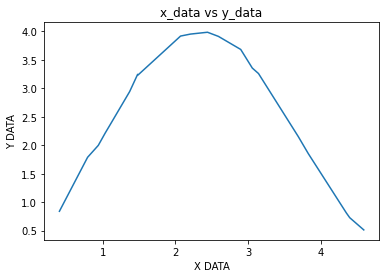

In [25]:
# Put your code here
plt.plot(x_data,y_data)
plt.xlabel('X DATA')
plt.ylabel('Y DATA')
plt.title('x_data vs y_data')

---
# 2. Polynomial fitting (19 pts)

As a starting point, let's see if we can fit a simple polynomial model to this mysterious data.

&#9989;&nbsp; **Question 2.1: (3 pts)** Using the NumPy `polyfit` function, fit the data with a second order polynomial, which has the form $y=f(x)=a_0x^2+a_1x+a_2$. The parameters, $a_0$, $a_1$ and $a_2$, will be determined by the `polyfit` function.

Once you're created the fit, use `poly1d` to create a function based on your fit and use this new function to **plot the data together with the best fit second order polynomial model**. Include a legend to make it clear what information represents the data and what information represents the best fit.


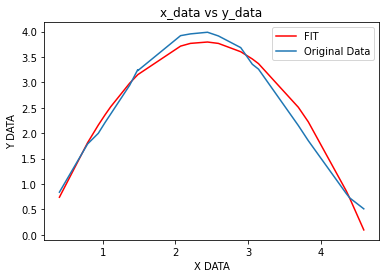

In [61]:
# Put your code here
fit, res, _, _, _ = np.polyfit(x_data, y_data,2,full=True)
func = np.poly1d(fit)
plt.plot(x_data,func(x_data),color='red',label='FIT')
plt.plot(x_data,y_data,label='Original Data')
plt.xlabel('X DATA')
plt.ylabel('Y DATA')
plt.title('x_data vs y_data')
plt.legend()

### How good is this fit? Let's check!

We're we're fitting models to data, one way that we can inspect the "goodness of fit" is to calculate the "residuals" of the fit.

We define the *residuals*, $r_i$, as the difference between each known data point $y_i$ and the *expected* $y$ value from the best fit model evaluated at $x_i$, i.e.

$$
r_i = y_i - f(x_i).
$$

where $f$ is the function that we've fit to the data.

&#9989;&nbsp; **Question 2.2: (4 pts)** Calculate the residuals $r_i$ for the second order fit you have done previously and plot the residual values vs $x_i$. If all goes well, you should get something that looks like this:

<div align='center'><img src="https://i.ibb.co/RgCgzyV/residuals-example.png" alt="residuals-example" border="0"></div>


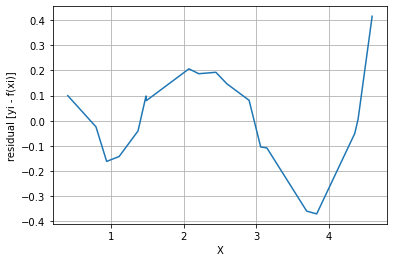

In [91]:
# Put your code here
r = []
x = 0
for i in func(x_data):
    ri = y_data[x] - i
    x+=1
    r.append(ri)
    
plt.plot(x_data,r)
plt.xlabel('X')
plt.ylabel('residual [yi - f(xi)]')
plt.grid()


### Would a higher order polynomial do a better job?

Let's check!

&#9989;&nbsp; **Question 2.3: (3 pts)** Re-fit the data using a **third-order polynomial**, similar to what you have done in question 2.1. Plot the data and the best fit model for this fit.

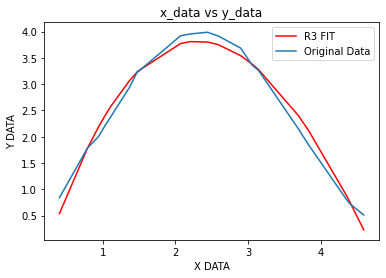

In [93]:
# Put your code here
fit, res, _, _, _ = np.polyfit(x_data, y_data,3,full=True)
func = np.poly1d(fit)
plt.plot(x_data,func(x_data),color='red',label='R3 FIT')
plt.plot(x_data,y_data,label='Original Data')
plt.xlabel('X DATA')
plt.ylabel('Y DATA')
plt.title('x_data vs y_data')
plt.legend()

&#9989;&nbsp; **Question 2.4: (4 pts)** Calculate the residuals $r_i$ for this new third order fit and **plot them together with the residuals for the second order fit** vs $x_i$. By plotting the residuals for both models, you can compare the fits.


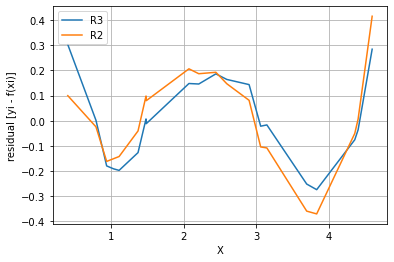

In [97]:
# Put your code here
r3 = []
x = 0
for i in func(x_data):
    ri = y_data[x] - i
    x+=1
    r3.append(ri)
    
plt.plot(x_data,r3,label='R3')
plt.plot(x_data,r,label='R2')
plt.xlabel('X')
plt.ylabel('residual [yi - f(xi)]')
plt.grid()
plt.legend()

### Can we tell which one is better by eye?

The residuals allow one to judge how far the fit function is from the data for each data point. Visual inspection of the residuals can give us a nice first approximation for which fit might be better, but we can also do some additional calculations to estimate the goodness of fit.

To construct an aggregate characteristic of the deviation of the best fit model from the data we can calculate the sum of the residuals squared:

$$
R=\sum_{i=1}^{N}r_i^2.
$$

The closer the fit is to the actual data, the smaller $R$ should be. In fact, the fitting process tries to minimize $R$ when searching for the best values of the fit parameters.

&#9989;&nbsp; **Question 2.4: (2 pts)** Calculate and **print** the sum of the residuals squared, $R$, for both the second and third order fits you performed previously. Since you're working with NumPy arrays this should be a relatively straightforward calculation -- thanks, NumPy!


In [100]:
# Put your code here
fit, res2, _, _, _ = np.polyfit(x_data, y_data,2,full=True)
fit, res3, _, _, _ = np.polyfit(x_data, y_data,3,full=True)
print('r2:',res2,'r3:',res3)

r2: [0.70288074] r3: [0.56720494]


&#9989;&nbsp; **Question 2.5: (3 pts)** Review your plots of the residuals and your calculated $R$ values. Do you observe any differences between the second- and third-order fits? If so, how do you interpret them?

<font size="+3">&#9998;</font> *yes the sum of the r values for r3 is smaller than r2, meaning it is more accurate, or a closer fit*

---
# 3. Curve fitting (21 pts)

In many situations, polynomial fitting may not be sufficient to correctly describe the data. The SciPy package provides additional functionality via the `curve_fit` function, which allows one to fit data to an arbitrary, user-defined function to data.

Let's try to do that now!

&#9989;&nbsp; **Question 3.1: (3 pts)** Write a function called `fit_function` that takes the following arguments: $x$, $A$, $B$, $C$, $D$, where $x$ may be a single floating point value or a NumPy array and the rest are all floating point parameter values. This function should return the following value(s):

$$
A\cos(Bx+C)+D
$$

If $x$ is defined as an array, then function should return an array of values evaluated with the formula above. Since NumPy allows you to do math with arrays just as easily as individual values, the function should look the same regardless of whether $x$ is a single value or an array of values as long as you use NumPy's `cos()` function.

In [101]:
# Put your code here
def fit_function(x,A,B,C,D):
    function=A*np.cos(B*x+C)+D
    return function

### How do you know if your function is working correctly?

The best option is to run a test to check it!

&#9989;&nbsp; **Question 3.2: (2 pts)** Provide a simple test case that demonstrates clearly that your function is working correctly.

In [141]:
# Put your code here
x = x_data
y = fit_function(x,4,10,65,10)
fit_function(x,4,10,65,10)

array([13.98784598,  6.83724308, 12.12011366, 13.99224842, 13.05566813,
        6.054003  ,  8.79266309,  8.93080924,  7.47846635, 12.48915503,
       10.45831596,  6.06846674, 13.86975457, 10.91729472,  7.67319221,
       10.71512038,  6.28114978,  9.39564822,  7.70228857,  7.75467402])

### Now let's calculate the best fit using your new function

&#9989;&nbsp; **Question 3.3: (4 pts)** Use SciPy's `curve_fit` function to find the best fit model parameters for the data using your `fit_function`. **Plot the data and the best fit. Also print the resulting parameters.**

parameters: [-0.44450984  4.3880526  -6.72403407  9.75621698]


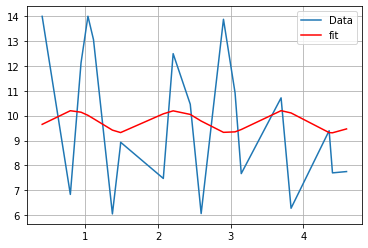

In [142]:
# Put your code here
popt,pcov = curve_fit(fit_function,x,y)
fitdata = fit_function(x, *popt)
print('parameters:',popt)
plt.plot(x, y,label='Data')
plt.plot(x, fitdata ,label='fit',color='red')
plt.legend()
plt.grid()

### Check the fit for this model!

&#9989;&nbsp; **Question 3.4: (4 pts)** Calculate the residuals $r_i$ for the best fit from your `fit_function` model. **Plot them together with the residuals for the second- and third-order polynomial fits** you have done previously vs $x_i$ on the **same plot**.

In [143]:
# Put your code here
res = []
c = 0
for i in fitdata:
    ri = y[c] - i
    c+=1
    res.append(ri)

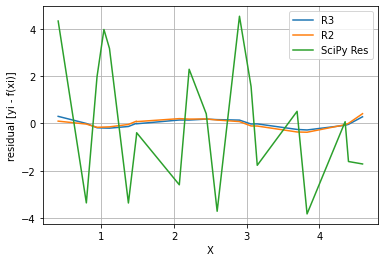

In [144]:
plt.plot(x_data,r3,label='R3')
plt.plot(x_data,r,label='R2')
plt.plot(x_data,res,label='SciPy Res')
plt.xlabel('X')
plt.ylabel('residual [yi - f(xi)]')
plt.grid()
plt.legend()

&#9989;&nbsp; **Question 3.5: (3 pts)** How do you interpret the results of the various fits? What function fits the data best? Feel free to calculate the $R$ value for this new fit as well to help make your case.


<font size="+3">&#9998;</font> *A straight line on the graph above would be a perfect fit, so the poly fit functuions showed to be better fitting compared to scipy. This could also be becasue of the values i chose for my fit function, but the residual value R is largest no matter what values I input. *

### Making model predictions and comparing to new data

&#9989;&nbsp; **Question 3.6: (3 pts)** Now consider a data set that provides additional data that was not included in the previous fits (given in the two arrays below). **Without doing any more model fitting**, plot the original and additional data along with the third-order polynomial fit and the `fit_function` model all on the **same plot**. Make sure you plot the model fits over the **full available data range**.

In [145]:
# extra data set
x_extra_data = np.array( [5.3229650750595, 5.633239470850604, 5.750884914645006, 5.826876621357705, 5.887972684358958, 6.096345847968898, 6.187202006304888, 6.765236891583813, 6.953644755179317, 7.073671951491773, 7.446975451610583, 7.95376118479588, 8.063631425921262, 8.482929224709505, 8.519748124805115, 8.674443631751686] )
y_extra_data = np.array( [-0.09592991491016956, 0.18161031008810616, 0.4463362298918295, 0.597718520722503, 0.4516983112826173, 0.9551067395097114, 1.0140727566356271, 2.257415883023609, 2.6558931363664513, 2.9269054682388735, 3.6478789988152154, 4.039053265154176, 4.003857552411617, 3.750367757237099, 3.737319967098405, 3.5367271755369765] )


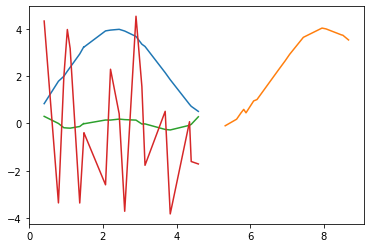

In [148]:
# Put your code here
plt.plot(x_data,y_data,label='Original Data')
plt.plot(x_extra_data,y_extra_data,label='Extra Data')
plt.plot(x_data,r3,label='R3')
plt.plot(x_data,res,label='SciPy Res')

&#9989;&nbsp; **Question 3.7: (3 pts)** Given the new data, which fit has better predictive power?


<font size="+3">&#9998;</font> *The better predictive power is in my fit fucntion, not numpy lib. This predictive power means which r curve best predicts the future of the line if the ranges were expanded.*

&#169; Copyright 2020, [Department of Computational Mathematics, Science and Engineering](https://cmse.msu.edu) at Michigan State University.